In [223]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [224]:
df = pd.read_csv('housing.csv')

In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [226]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [227]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [228]:
df.shape

(20640, 10)

In [229]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [230]:

from sklearn.impute import SimpleImputer



imputer = SimpleImputer(strategy='median')

# Reshape the column to be imputed
total_bedrooms = df['total_bedrooms'].values.reshape(-1, 1)
imputed_total_bedrooms = imputer.fit_transform(total_bedrooms)
df['total_bedrooms'] = imputed_total_bedrooms

print(df.isnull().sum())


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


In [231]:
#Treating the categorical data


from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
encoded_data = encoder.fit_transform(df[['ocean_proximity']])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.categories_[0])
# Concatenate the encoded DataFrame with the original data
data_encoded = pd.concat([df.drop('ocean_proximity', axis=1), encoded_df], axis=1)
print(data_encoded.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value  <1H OCEAN  \
0       322.0       126.0         8.3252            452600.0        0.0   
1      2401.0      1138.0         8.3014            358500.0        0.0   
2       496.0       177.0         7.2574            352100.0        0.0   
3       558.0       219.0         5.6431            341300.0        0.0   
4       565.0       259.0         3.8462            342200.0        0.0   

   INLAND  ISLAND  NEAR BAY  NEAR OCEAN  
0     0.0     0.0       1.0         0.0  
1     0.0     

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [232]:
data_encoded.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
<1H OCEAN             0
INLAND                0
ISLAND                0
NEAR BAY              0
NEAR OCEAN            0
dtype: int64

In [233]:
y = data_encoded[["median_house_value"]]
X = data_encoded.drop(["median_house_value"], axis = 1)


In [234]:
y

,median_house_value
0,452600.0
1,358500.0
2,352100.0
3,341300.0
4,342200.0
...,...
20635,78100.0
20636,77100.0
20637,92300.0
20638,84700.0


In [235]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,0.0,1.0,0.0,0.0,0.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,0.0,1.0,0.0,0.0,0.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,0.0,1.0,0.0,0.0,0.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,0.0,1.0,0.0,0.0,0.0


In [236]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [237]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [238]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [239]:
"""
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
"""

'\nfrom sklearn.decomposition import PCA\npca = PCA(n_components = 2)\nX_train = pca.fit_transform(X_train)\nX_test = pca.transform(X_test)\n'

In [240]:

"""from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 5)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)
"""


'from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA\nlda = LDA(n_components = 5)\nX_train = lda.fit_transform(X_train, y_train)\nX_test = lda.transform(X_test)\n'

In [241]:
X_train

array([[ 0.73099911, -0.8607415 ,  0.66640687, ..., -0.01607684,
        -0.35632238, -0.37874539],
       [-1.19670983,  0.70916822,  1.06288858, ..., -0.01607684,
        -0.35632238, -0.37874539],
       [-1.55128842,  1.31370062,  0.58711053, ..., -0.01607684,
        -0.35632238, -0.37874539],
       ...,
       [ 0.60115343, -0.75764295,  0.58711053, ..., -0.01607684,
        -0.35632238, -0.37874539],
       [-1.1867217 ,  0.90599273, -1.07811266, ..., -0.01607684,
        -0.35632238, -0.37874539],
       [-1.41644868,  0.99503238,  1.855852  , ..., -0.01607684,
         2.80644736, -0.37874539]])

LINEAR REGRESSION

In [242]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [243]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

predictions = regressor.predict(X_test)
actual_values = y_test

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(actual_values, predictions)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(actual_values, predictions)

# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(actual_values, predictions, squared=False)

# Calculate R-squared (R2) score
r1 = r2_score(actual_values, predictions)

# Print the calculated metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r1)


Mean Absolute Error (MAE): 50304.502434004164
Mean Squared Error (MSE): 4796896441.4205
Root Mean Squared Error (RMSE): 69259.63067632183
R-squared (R2) Score: 0.6374825568355214


RANDOM FOREST

In [244]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)

<ipython-input-244-4436768c41df>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train, y_train)


RandomForestRegressor()

In [245]:

predictions = regressor.predict(X_test)
actual_values = y_test

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(actual_values, predictions)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(actual_values, predictions)

# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(actual_values, predictions, squared=False)

# Calculate R-squared (R2) score
r2 = r2_score(actual_values, predictions)

# Print the calculated metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)

Mean Absolute Error (MAE): 31704.042823643416
Mean Squared Error (MSE): 2402495288.1130247
Root Mean Squared Error (RMSE): 49015.25566711883
R-squared (R2) Score: 0.8184354280528248


DECISION TREE

In [246]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [247]:

predictions = regressor.predict(X_test)
actual_values = y_test

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(actual_values, predictions)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(actual_values, predictions)

# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(actual_values, predictions, squared=False)

# Calculate R-squared (R2) score
r3 = r2_score(actual_values, predictions)

# Print the calculated metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r3)

Mean Absolute Error (MAE): 42558.39651162791
Mean Squared Error (MSE): 4497910296.1678295
Root Mean Squared Error (RMSE): 67066.46178357577
R-squared (R2) Score: 0.6600779357940265


KNN-REGRESSOR

In [248]:
from sklearn.neighbors import KNeighborsRegressor
regressor= KNeighborsRegressor()
regressor.fit(X_train, y_train)
regressor.score(X_test, y_test)

0.7146500415419744

In [249]:
predictions = regressor.predict(X_test)
actual_values = y_test

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(actual_values, predictions)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(actual_values, predictions)

# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(actual_values, predictions, squared=False)

# Calculate R-squared (R2) score
r4 = r2_score(actual_values, predictions)

# Print the calculated metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r4)

Mean Absolute Error (MAE): 40887.90992248062
Mean Squared Error (MSE): 3775802312.678652
Root Mean Squared Error (RMSE): 61447.55741832747
R-squared (R2) Score: 0.7146500415419744


In [250]:
accuracy_df = pd.DataFrame({
    'Model': ['linear',  'RandomForest','Decision ','KNN'],
    'Accuracy': [r1,r2,r3,r4]
})

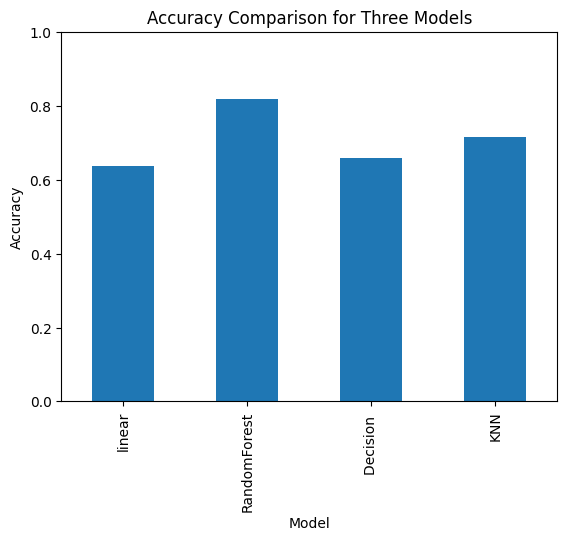

In [251]:
accuracy_df.plot(x='Model', y='Accuracy', kind='bar', legend=False)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison for Three Models')
plt.ylim(0, 1)  # Set the y-axis limits between 0 and 1
plt.show()


In [222]:

from sklearn.model_selection import GridSearchCV

regressor = RandomForestRegressor()


param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create an instance of GridSearchCV and perform grid search
grid_search = GridSearchCV(estimator=regressor, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
grid_search.best_estimator_
grid_search.best_estimator_ .score(X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

0.8200676871954018